<a href="https://colab.research.google.com/github/mixxdupp/anamoly-detection-forest-fire/blob/main/Anomaly_Detection_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

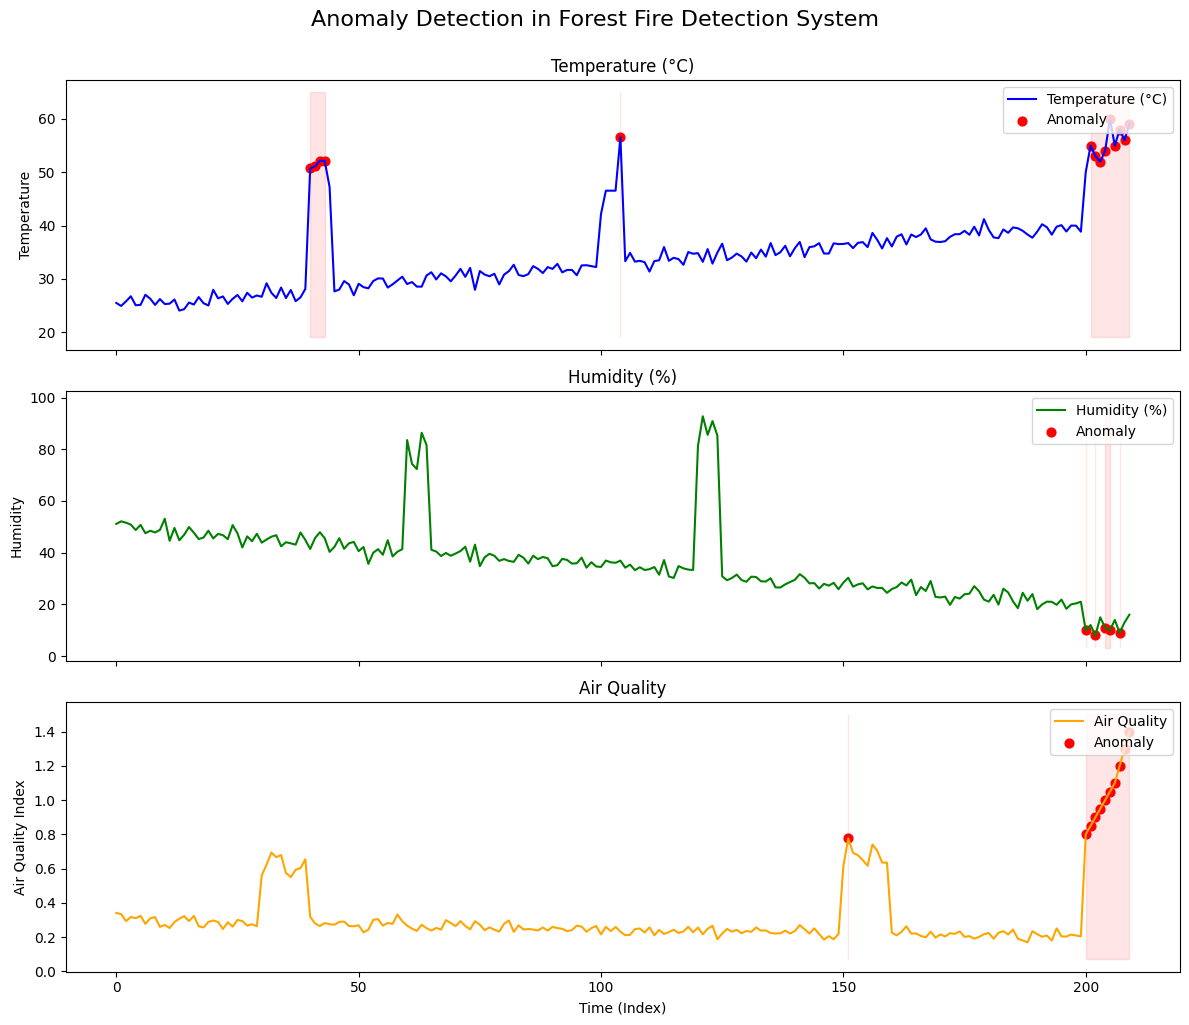

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Set a random seed for reproducibility
np.random.seed(42)

# =====================
# Generate Synthetic Data
# =====================
n_normal = 200  # Number of normal data points
n_anomalies = 20  # Number of anomaly data points

# Time variable for plotting
time = np.arange(n_normal + n_anomalies)

# Create synthetic data for each sensor
temperature = np.linspace(25, 40, n_normal) + np.random.normal(0, 1, n_normal)
temperature[40:45] = np.random.normal(50, 2, 5)  # Simulated fire spike
temperature[100:105] = np.random.normal(45, 3, 5)  # Another spike

humidity = np.linspace(50, 20, n_normal) + np.random.normal(0, 2, n_normal)
humidity[60:65] = np.random.normal(80, 5, 5)  # Simulated rain spike
humidity[120:125] = np.random.normal(85, 5, 5)

air_quality = np.linspace(0.3, 0.2, n_normal) + np.random.normal(0, 0.02, n_normal)
air_quality[30:40] = np.random.normal(0.6, 0.05, 10)  # Pollution spike
air_quality[150:160] = np.random.normal(0.7, 0.05, 10)

# Add anomaly points
temperature_anomalies = [50, 55, 53, 52, 54, 60, 55, 58, 56, 59]
humidity_anomalies = [10, 12, 8, 15, 11, 10, 14, 9, 13, 16]
air_quality_anomalies = [0.8, 0.85, 0.9, 0.95, 1.0, 1.05, 1.1, 1.2, 1.3, 1.4]

# Combine normal and anomaly data
temperature = np.concatenate([temperature, temperature_anomalies])
humidity = np.concatenate([humidity, humidity_anomalies])
air_quality = np.concatenate([air_quality, air_quality_anomalies])

# Create a DataFrame for easy data management
data = pd.DataFrame({
    "temperature": temperature,
    "humidity": humidity,
    "air_quality": air_quality
})

# =====================
# Train the Isolation Forest Model
# =====================
model = IsolationForest(contamination=0.1, random_state=42)
model.fit(data)

# Create lists to store data and anomaly indices for plotting
x_data = list(range(len(data)))  # Time axis
temp_data, hum_data, aq_data = [], [], []
anomaly_indices_temp, anomaly_indices_hum, anomaly_indices_aq = [], [], []

# Detect anomalies and record indices
for index, row in data.iterrows():
    prediction = model.predict(pd.DataFrame([row]))[0]
    status = "Normal" if prediction == 1 else "Anomaly Detected!"

    # Append data points
    temp_data.append(row["temperature"])
    hum_data.append(row["humidity"])
    aq_data.append(row["air_quality"])

    # Record anomaly indices
    if status == "Anomaly Detected!":
        if row["temperature"] > 50:
            anomaly_indices_temp.append(index)
        if row["humidity"] < 12:
            anomaly_indices_hum.append(index)
        if row["air_quality"] > 0.7:
            anomaly_indices_aq.append(index)

# =====================
# Visualize Results
# =====================
fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# 1. Temperature Plot with Anomalies
axs[0].plot(x_data, temp_data, label="Temperature (°C)", color='blue')
axs[0].scatter(anomaly_indices_temp, [temp_data[i] for i in anomaly_indices_temp], color="red", label="Anomaly", s=40)
axs[0].fill_between(x_data, min(temp_data)-5, max(temp_data)+5, where=np.isin(x_data, anomaly_indices_temp), color="red", alpha=0.1)
axs[0].set_title("Temperature (°C)")
axs[0].set_ylabel("Temperature")
axs[0].legend(loc="upper right")

# 2. Humidity Plot with Anomalies
axs[1].plot(x_data, hum_data, label="Humidity (%)", color='green')
axs[1].scatter(anomaly_indices_hum, [hum_data[i] for i in anomaly_indices_hum], color="red", label="Anomaly", s=40)
axs[1].fill_between(x_data, min(hum_data)-5, max(hum_data)+5, where=np.isin(x_data, anomaly_indices_hum), color="red", alpha=0.1)
axs[1].set_title("Humidity (%)")
axs[1].set_ylabel("Humidity")
axs[1].legend(loc="upper right")

# 3. Air Quality Plot with Anomalies
axs[2].plot(x_data, aq_data, label="Air Quality", color='orange')
axs[2].scatter(anomaly_indices_aq, [aq_data[i] for i in anomaly_indices_aq], color="red", label="Anomaly", s=40)
axs[2].fill_between(x_data, min(aq_data)-0.1, max(aq_data)+0.1, where=np.isin(x_data, anomaly_indices_aq), color="red", alpha=0.1)
axs[2].set_title("Air Quality")
axs[2].set_ylabel("Air Quality Index")
axs[2].set_xlabel("Time (Index)")
axs[2].legend(loc="upper right")

# Improve layout and display the plot
plt.tight_layout()
plt.suptitle("Anomaly Detection in Forest Fire Detection System", fontsize=16, y=1.02)
plt.subplots_adjust(top=0.95)
plt.show()